**Table of contents**<a id='toc0_'></a>    
1. [编写测试函数](#toc1_)    
1.1. [本地安装Tasks项目](#toc1_1_)    
1.2. [使用assert声明](#toc1_2_)    
1.3. [预期异常](#toc1_3_)    
1.4. [测试函数的标记](#toc1_4_)    
1.5. [跳过测试](#toc1_5_)    
1.6. [标记预期会失败的测试](#toc1_6_)    
1.7. [运行测试子集](#toc1_7_)    
1.7.1. [单个目录](#toc1_7_1_)    
1.7.2. [单个测试文件/模块](#toc1_7_2_)    
1.7.3. [单个测试函数](#toc1_7_3_)    
1.7.4. [单个测试类](#toc1_7_4_)    
1.7.5. [单个测试类中的测试方法](#toc1_7_5_)    
1.7.6. [使用测试名划分测试集合](#toc1_7_6_)    
1.8. [参数化测试](#toc1_8_)    
1.8.1. [第一个参数是逗号分隔的字符串列表，第二个参数是一个值列表。](#toc1_8_1_)    
1.8.2. [可以使用完整的测试标识](#toc1_8_2_)    
1.8.3. [测试标识中包含空格，要添加引号](#toc1_8_3_)    
1.8.4. [也可以将参数列表移出装饰器](#toc1_8_4_)    
1.8.5. [加入ids参数，使得列表中每一个元素都被标识。](#toc1_8_5_)    
1.8.6. [装饰器parametrize()加到类上，会传递给该类的所有方法。](#toc1_8_6_)    
1.8.7. [也可以使用pytest.param('值',id='id名称')](#toc1_8_7_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[编写测试函数](#toc0_)

## 1.1. <a id='toc1_1_'></a>[本地安装Tasks项目](#toc0_)
https://pragprog.com/titles/bopytest/python-testing-with-pytest/

pip install . 

## 1.2. <a id='toc1_2_'></a>[使用assert声明](#toc0_)
pytest可以重写assert关键字。pytest会截断原生assert的调用，替换成pytest定义的asset，从而提供更多的失败信息和细节。

pytest .\test_task_fail.py
## 1.3. <a id='toc1_3_'></a>[预期异常](#toc0_)
with pytest.raises(TypeError):</br>
    code......

pytest .\test_api_exceptions.py::test_add_raises


with pytest.raises(TypeError) as excinfo:</br>
    code......
pytest .\test_api_exceptions.py::test_start_tasks_db_raises

## 1.4. <a id='toc1_4_'></a>[测试函数的标记](#toc0_)
pytest -v -m 'smoke' .\test_api_exceptions.py

pytest -v -m 'get' .\test_api_exceptions.py

pytest -v -m 'smoke and get' .\test_api_exceptions.py

pytest -v -m 'smoke or get' .\test_api_exceptions.py

pytest -v -m 'smoke and not get' .\test_api_exceptions.py

## 1.5. <a id='toc1_5_'></a>[跳过测试](#toc0_)
@pytest.mark.skip(reason='misunderstood the API')

@pytest.mark.skipif(tasks.__version__ < '0.2.0',
                    reason='not supported until version 0.2.0')

pytest -rs .\test_unique_id_3.py

-r chars              Show extra test summary info as specified by chars: (f)ailed, (E)rror, (s)kipped, (x)failed, 
                        (X)passed, (p)assed, (P)assed with output, (a)ll except passed (p/P), or (A)ll. (w)arnings   
                        are enabled by default (see --disable-warnings), 'N' can be used to reset the list. (default:
                        'fE').

## 1.6. <a id='toc1_6_'></a>[标记预期会失败的测试](#toc0_)
@pytest.mark.xfail()

pytest -v .\test_unique_id_4.py

## 1.7. <a id='toc1_7_'></a>[运行测试子集](#toc0_)

### 1.7.1. <a id='toc1_7_1_'></a>[单个目录](#toc0_)
pytest 目录

pytest .\func
### 1.7.2. <a id='toc1_7_2_'></a>[单个测试文件/模块](#toc0_)
pytest .\func\test_add.py

### 1.7.3. <a id='toc1_7_3_'></a>[单个测试函数](#toc0_)
pytest .\func\test_add.py::test_add_returns_valid_id
### 1.7.4. <a id='toc1_7_4_'></a>[单个测试类](#toc0_)
pytest .\func\test_api_exceptions.py::TestUpdate
### 1.7.5. <a id='toc1_7_5_'></a>[单个测试类中的测试方法](#toc0_)
pytest .\func\test_api_exceptions.py::TestUpdate::test_bad_id

### 1.7.6. <a id='toc1_7_6_'></a>[使用测试名划分测试集合](#toc0_)
cd /tasks_proj
执行名字中包含_raises的测试
pytest -v -k _raises

跳过test_delete_raises()的执行
pytest -v -k "_raises and not delete"

## 1.8. <a id='toc1_8_'></a>[参数化测试](#toc0_)
### 1.8.1. <a id='toc1_8_1_'></a>[第一个参数是逗号分隔的字符串列表，第二个参数是一个值列表。](#toc0_)
        @pytest.mark.parametrize('task',
                                [Task('sleep', done=True),
                                Task('wake', 'brian'),
                                Task('breathe', 'BRIAN', True),
                                Task('exercise', 'BrIaN', False)])


        @pytest.mark.parametrize('summary, owner, done',
                         [('sleep', None, False),
                          ('wake', 'brian', False),
                          ('breathe', 'BRIAN', True),
                          ('eat eggs', 'BrIaN', False),
                          ])

### 1.8.2. <a id='toc1_8_2_'></a>[可以使用完整的测试标识](#toc0_)
pytest -v .\test_add_variety.py::test_add_3[sleep-None-False]

### 1.8.3. <a id='toc1_8_3_'></a>[测试标识中包含空格，要添加引号](#toc0_)
pytest -v ".\test_add_variety.py::test_add_3[eat eggs-BrIaN-False]"

### 1.8.4. <a id='toc1_8_4_'></a>[也可以将参数列表移出装饰器](#toc0_)

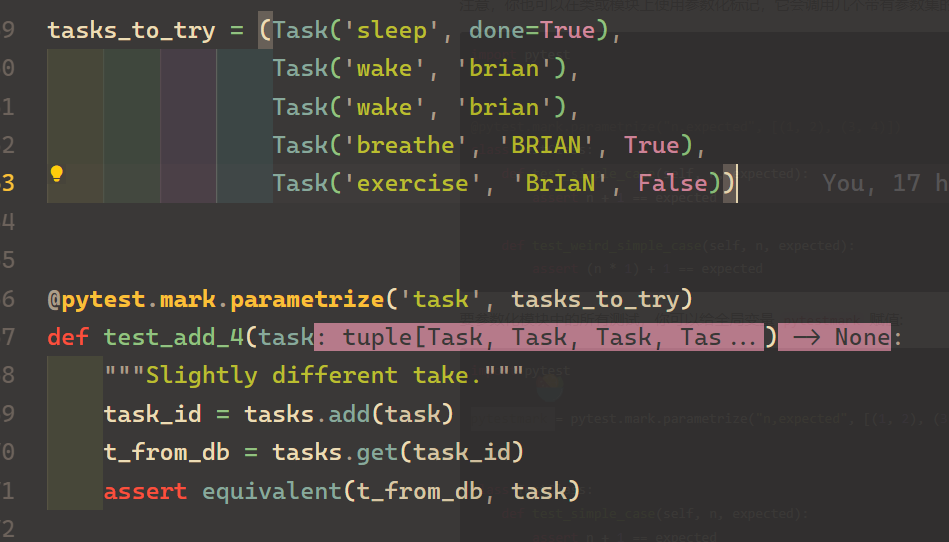

代码看起来美观，但是可读性较差。</br>
pytest -v .\test_add_variety.py::test_add_4

### 1.8.5. <a id='toc1_8_5_'></a>[加入ids参数，使得列表中每一个元素都被标识。](#toc0_)
pytest -v .\test_add_variety.py::test_add_5

### 1.8.6. <a id='toc1_8_6_'></a>[装饰器parametrize()加到类上，会传递给该类的所有方法。](#toc0_)
pytest -v .\test_add_variety.py::TestAdd

### 1.8.7. <a id='toc1_8_7_'></a>[也可以使用pytest.param('值',id='id名称')](#toc0_)
pytest -v .\test_add_variety.py::test_add_6



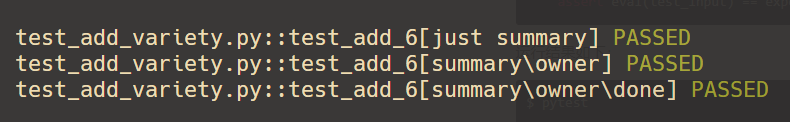